## IMPORT MODULES

In [24]:
import pandas as pd
import sys
import os
import re

sys.path.append(os.path.abspath(os.path.join('..')))
from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json
from clean_tweets_dataframe import Clean_Tweets
_, global_tweet_list = read_json("../data/global_twitter_data.json")

## INITIALIZE TweetDfExtractor INSTANCE AND GET DATA

In [25]:
global_tweet_df_extractor = TweetDfExtractor(global_tweet_list)
global_tweets_df = global_tweet_df_extractor.get_tweet_df()

## DATA PREPARATION

#### CHECK IF ALL DESIRED COLUMNS ARE EXTRACTED 

In [26]:
global_tweets_df.head()

,created_at,source,full_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy Extra random image I Lets focus ...,-1.250000e-01,0.190625,negative,en,15760,2,i_ameztoy,20497,2621,None,City++++,i_ameztoy++++,
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info #Chinas media explains the mi...,-1.000000e-01,0.100000,negative,en,6967,201,ZIisq,65,272,None,China++++Taiwan++++,IndoPac_Info++++,
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",China even cut off communication they dont anw...,0.000000e+00,0.000000,neutral,en,2166,0,Fin21Free,85,392,None,XiJinping++++,ZelenskyyUa++++,Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Putin to #XiJinping I told you my friend Taiwa...,1.000000e-01,0.350000,positive,en,2166,0,Fin21Free,85,392,None,XiJinping++++,,Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @ChinaUncensored I’m sorry I thought Taiwan...,-6.938894e-18,0.556250,negative,en,17247,381,VizziniDolores,910,2608,None,,ChinaUncensored++++,"Ayent, Schweiz"


In [27]:
global_tweets_df.shape

(22000, 16)

#### INITIALIZE Clean_Tweets INSTANCE

In [28]:
global_clean_tweets = Clean_Tweets(global_tweets_df)

Clean_Tweets INSTANCE CREATED


#### DROP DUPLICATES 
##### BY USING PANDAS df.drop_duplicates() which is called by our global_clean_tweets.drop_duplicate(global_tweets_df) function

In [29]:
global_tweets_df = global_clean_tweets.drop_duplicate(global_tweets_df)
global_tweets_df.shape
# We can see that on the below output we have droped 3 duplicate rows.

(21997, 16)

#### REMOVE NON ENGLISH

In [30]:
global_tweets_df = global_clean_tweets.remove_non_english_tweets(global_tweets_df)
global_tweets_df.shape
# We can see no rows were dropped because all the languages represent 'en'

(21997, 16)

#### CHECK FOR NULL/MISSING VALUES

In [31]:
global_tweets_df.isna().sum()
# We can see that we have 15807 missing values under the column 'possibly_sensitive'

created_at                0
source                    0
full_text                 0
polarity                  0
subjectivity              0
sentiment                 0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    15807
hashtags                  0
user_mentions             0
place                     0
dtype: int64

##### HANDLE MISSING DATA

In [32]:
global_tweets_df['possibly_sensitive'] = global_tweets_df['possibly_sensitive'].fillna("not_found")
global_tweets_df.isna().sum()
# The missing rows under the column 'possibly_sensitive' have been repaced with "not_found"

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

In [33]:
global_tweets_df[global_tweets_df['place'] == ''].shape
# Eventhough on the above output there were 0 missing data under the column 'place' those missing data's were 
# an empty string rather than a null value, so we have to replace those value with "not_known"

(9890, 16)

In [34]:
global_tweets_df['place'] = global_tweets_df['place'].fillna("not_known")
global_tweets_df.isna().sum()


created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

#### REMOVE UNWANTED CHARACTERS

In [35]:
global_tweets_df['place'][124:126]

124    Nunya*
125          
Name: place, dtype: object

In [36]:
global_tweets_df = global_clean_tweets.remove_place_characters(global_tweets_df)
global_tweets_df.isna().sum()

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

In [37]:
global_tweets_df['place'][124:126]
# We can see that invalid characters under the column 'place' are replaced and cleaned 

124    Nunya
125         
Name: place, dtype: object

#### CONVERT STRING TO DATETIME

In [38]:
global_tweets_df.info()
# We can see that below the column 'created_at' has the type of object/string, we will change this to
# datetime using pd.to_datetime(df) which is called by global_clean_tweets.convert_to_datetime(global_tweets_df) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21997 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   full_text           21997 non-null  object 
 3   polarity            21997 non-null  float64
 4   subjectivity        21997 non-null  float64
 5   sentiment           21997 non-null  object 
 6   lang                21997 non-null  object 
 7   favorite_count      21997 non-null  int64  
 8   retweet_count       21997 non-null  int64  
 9   original_author     21997 non-null  object 
 10  followers_count     21997 non-null  int64  
 11  friends_count       21997 non-null  int64  
 12  possibly_sensitive  21997 non-null  object 
 13  hashtags            21997 non-null  object 
 14  user_mentions       21997 non-null  object 
 15  place               21997 non-null  object 
dtypes: f

In [39]:
global_tweets_df = global_clean_tweets.convert_to_datetime(global_tweets_df)
global_tweets_df.info()
# Now we can see that it is converted to datetime64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21997 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          21997 non-null  datetime64[ns, UTC]
 1   source              21997 non-null  object             
 2   full_text           21997 non-null  object             
 3   polarity            21997 non-null  float64            
 4   subjectivity        21997 non-null  float64            
 5   sentiment           21997 non-null  object             
 6   lang                21997 non-null  object             
 7   favorite_count      21997 non-null  int64              
 8   retweet_count       21997 non-null  int64              
 9   original_author     21997 non-null  object             
 10  followers_count     21997 non-null  int64              
 11  friends_count       21997 non-null  int64              
 12  possibly_sensitive  21997 non-nu

#### CLEAN SOURCE DATA

In [40]:
global_tweets_df['source'][:5]
# We can see that understanding device type from source column is not easily readable so we will extract 
# source using global_clean_tweets.extract_twitter_source(global_tweets_df)

0    <a href="http://twitter.com/download/android" ...
1    <a href="http://twitter.com/download/android" ...
2    <a href="http://twitter.com/download/android" ...
3    <a href="http://twitter.com/download/android" ...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [41]:
global_tweets_df["source"] = global_tweets_df["source"].apply(global_clean_tweets.extract_twitter_source)
global_tweets_df['source'][:5]

0    Twitter for Android
1    Twitter for Android
2    Twitter for Android
3    Twitter for Android
4     Twitter for iPhone
Name: source, dtype: object

#### SAVE THE PRE PROCESSED DATA

In [42]:
global_tweets_df.to_csv("../data/processed_global_data_tweets.csv", index=False)

## DATA EXPLORATION AND VISUALIZATIONS

### BASIC INFORMATION

In [47]:
# c_global_tweets_df = pd.read_csv("../data/processed_global_data_tweets.csv")
global_tweets_df.head()

,created_at,source,full_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-07 22:31:20+00:00,Twitter for Android,RT @i_ameztoy Extra random image I Lets focus ...,-1.250000e-01,0.190625,negative,en,15760,2,i_ameztoy,20497,2621,not_found,City++++,i_ameztoy++++,
1,2022-08-07 22:31:16+00:00,Twitter for Android,RT @IndoPac_Info #Chinas media explains the mi...,-1.000000e-01,0.100000,negative,en,6967,201,ZIisq,65,272,not_found,China++++Taiwan++++,IndoPac_Info++++,
2,2022-08-07 22:31:07+00:00,Twitter for Android,China even cut off communication they dont anw...,0.000000e+00,0.000000,neutral,en,2166,0,Fin21Free,85,392,not_found,XiJinping++++,ZelenskyyUa++++,Netherlands
3,2022-08-07 22:31:06+00:00,Twitter for Android,Putin to #XiJinping I told you my friend Taiwa...,1.000000e-01,0.350000,positive,en,2166,0,Fin21Free,85,392,not_found,XiJinping++++,,Netherlands
4,2022-08-07 22:31:04+00:00,Twitter for iPhone,RT @ChinaUncensored I’m sorry I thought Taiwan...,-6.938894e-18,0.556250,negative,en,17247,381,VizziniDolores,910,2608,not_found,,ChinaUncensored++++,Ayent Schweiz


In [46]:
global_tweets_df.isna().sum()

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

### ORIGINAL AUTHORS

In [51]:
global_tweets_df['original_author'].value_counts()
# Authors count

TrumpThuan        116
CGMeifangZhang     65
AarianNewsX        59
Lin73324756        48
Bin20211001        46
                 ... 
papago5             1
pmsxa               1
SomethingThar       1
omotenashi_cx       1
ZeitounRimal        1
Name: original_author, Length: 13433, dtype: int64

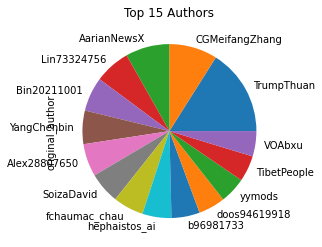

In [55]:
global_tweets_df['original_author'].value_counts().head(15).plot(kind='pie',  title="Top 15 Authors");
#Top 15 authors plotted using pie chart
#We can see that author "TrumpThuan" has 116 tweets making him/her the top author of the collected data.

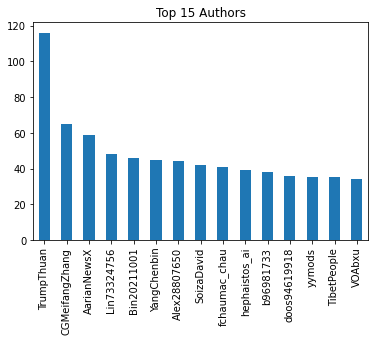

In [54]:
global_tweets_df['original_author'].value_counts().head(15).plot(kind='bar',  title="Top 15 Authors");
#Top 15 authors plotted using bar graph

### USER MENTIONS

In [56]:
global_tweets_df['user_mentions']

0              i_ameztoy++++
1           IndoPac_Info++++
2            ZelenskyyUa++++
3                           
4        ChinaUncensored++++
                ...         
21995       IndoPac_Info++++
21996       IndoPac_Info++++
21997            Reuters++++
21998       IndoPac_Info++++
21999       IndoPac_Info++++
Name: user_mentions, Length: 21997, dtype: object

In [80]:
global_user_mentions_list_df = global_tweets_df.loc[global_tweets_df["user_mentions"] != ""]
global_user_mentions_list_df = global_user_mentions_list_df['user_mentions']
global_user_mentions_list_df
# We take the rows that have values in the column 'user_mentions'


0              i_ameztoy++++
1           IndoPac_Info++++
2            ZelenskyyUa++++
4        ChinaUncensored++++
5         benedictrogers++++
                ...         
21995       IndoPac_Info++++
21996       IndoPac_Info++++
21997            Reuters++++
21998       IndoPac_Info++++
21999       IndoPac_Info++++
Name: user_mentions, Length: 18695, dtype: object

In [83]:
splitted_user_mentions = []
for mentions_list in global_user_mentions_list_df[40:60]:
    mentions_list = mentions_list.split("++++")
    for user_mentions in mentions_list:
        if user_mentions != '':
            splitted_user_mentions.append(user_mentions)
splitted_user_mentions_df = pd.DataFrame(splitted_user_mentions, columns=['user_mentions'])
splitted_user_mentions_df.head(10)
#create dataframe where each 'user_mention' is splitted and gets a new row

,user_mentions
0,benedictrogers
1,BarkingMaad
2,EnemyInAState
3,khalediskef
4,AlArabiya_Eng
5,revmahoney
6,WilliamYang120
7,serpentza
8,CGMeifangZhang
9,ChaoyangShaoxia


In [85]:
splitted_user_mentions_df.value_counts()

user_mentions  
SpokespersonCHN    3
CGMeifangZhang     3
StephenMcDonell    1
serpentza          1
revmahoney         1
kuomintang         1
khalediskef        1
container_news     1
benedictrogers     1
WilliamYang120     1
AlArabiya_Eng      1
AnonOpsSE          1
PaulJawin          1
POTUS              1
IndoPac_Info       1
EnemyInAState      1
ChaoyangShaoxia    1
BarkingMaad        1
Apple              1
timand2037         1
dtype: int64

<AxesSubplot:title={'center':'Top 4 user mentions'}, xlabel='user_mentions'>

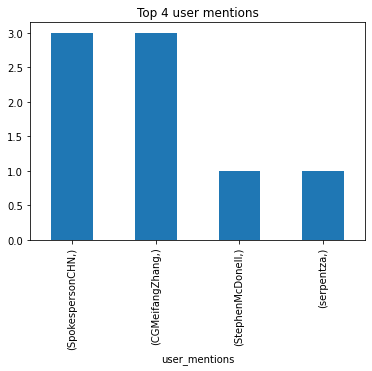

In [87]:
splitted_user_mentions_df.value_counts().head(4).plot(kind='bar', title="Top 4 user mentions");

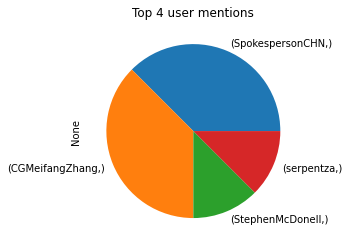

In [88]:
splitted_user_mentions_df.value_counts().head(4).plot(kind='pie', title="Top 4 user mentions");


### LOCATIONS

In [95]:
place_global_tweets_df = global_tweets_df[global_tweets_df['place']!='']
place_global_tweets_df = place_global_tweets_df[place_global_tweets_df['place']!=' ']
place_global_tweets_df['place'].value_counts()
#We can see that majority of users in this dataset are from India, US, Hong Kong, and Vit Nam

India                     200
United States             166
Hong Kong                 153
Vit Nam                   118
Taiwan                     99
                         ... 
Makassar Indonesia          1
xx                          1
Lephalale South Africa      1
Occopied Pakistan           1
Gelendzhik                  1
Name: place, Length: 3919, dtype: int64

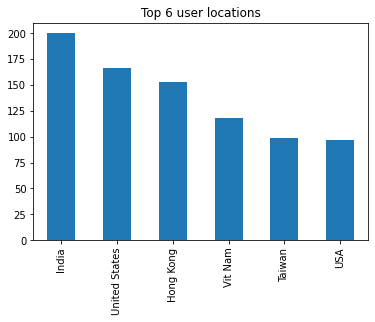

In [98]:
place_global_tweets_df['place'].value_counts().head(6).plot(kind='bar', title="Top 6 user locations");
# Top 6 user locations

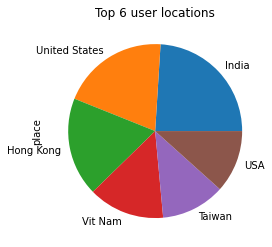

In [99]:
place_global_tweets_df['place'].value_counts().head(6).plot(kind='pie', title="Top 6 user locations");
# Top 6 user locations